In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def clean_cols(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('&', 'and').str.replace(',', '_').str.replace('type', 'cost_type').str.replace('+', 'up')
    return df

In [3]:
reviews = pd.read_csv('google_data/googleplaystore.csv')

In [4]:
# get list of genres to create dummy variables
genre_list = []
for i in range(len(reviews['Genres'])):
    for j in range(len(reviews['Genres'][i].split(';'))):
        genre = reviews['Genres'][i].split(';')[j]
        if genre not in genre_list:
            genre_list.append(genre)

In [5]:
# make dummy variables for genre
for i in range(len(genre_list)):
    for j in range(len(reviews['Genres'])):
        if genre_list[i] in reviews['Genres'][j]:
            reviews['genre_' + genre_list[i]] = 1
        else:
            reviews['genre_' + genre_list[i]] = 0

In [6]:
cat = pd.get_dummies(reviews.Category, prefix='cat_')
reviews = reviews.join(cat)

In [7]:
reviews = clean_cols(reviews.drop(['Genres'], axis=1))

In [8]:
# create other summy variables
cost_type = pd.get_dummies(reviews.cost_type, prefix='type_')
reviews = reviews.join(cost_type)

content_rating = pd.get_dummies(reviews.content_rating, prefix='contrat_')
reviews = reviews.join(content_rating)

In [9]:
drop_cols = ['category', 'current_ver', 'android_ver', 'cost_type', 'content_rating', 'last_updated', 'size']
reviews = clean_cols(reviews.drop(drop_cols, axis=1))

In [10]:
clean_cols = ['installs', 'price']

for col in clean_cols:
    reviews[col] = reviews[col].str.strip('$').str.strip('+').str.strip(',')

In [12]:
reviews.price = reviews.price.astype(float)
reviews.installs = reviews.installs.astype(int)

In [13]:
reviews.head()

,app,rating,reviews,installs,price,genre_art_and_design,genre_creativity,genre_pretend_play,genre_action_and_adventure,genre_auto_and_vehicles,...,cat__video_players,cat__weather,cost_type__free,cost_type__paid,contrat__adults_only_18up,contrat__everyone,contrat__everyone_10up,contrat__mature_17up,contrat__teen,contrat__unrated
0,X Launcher Prime: With OS Style Theme & No Ads,4.7,149,1000,1.99,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,X Launcher Pro - IOS Style Theme & Control Center,4.8,1216,10000,1.99,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,X Launcher Pro: PhoneX Theme OS11 Control Center,4.7,801,5000,1.99,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,350 Diy Room Decor Ideas,4.5,27,10000,0.00,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,3D Color Pixel by Number - Sandbox Art Coloring,4.4,1518,100000,0.00,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 99 columns):
app                                10841 non-null object
rating                             9367 non-null float64
reviews                            10841 non-null int64
installs                           10841 non-null int32
price                              10841 non-null float64
genre_art_and_design               10841 non-null int64
genre_creativity                   10841 non-null int64
genre_pretend_play                 10841 non-null int64
genre_action_and_adventure         10841 non-null int64
genre_auto_and_vehicles            10841 non-null int64
genre_beauty                       10841 non-null int64
genre_books_and_reference          10841 non-null int64
genre_business                     10841 non-null int64
genre_comics                       10841 non-null int64
genre_communication                10841 non-null int64
genre_dating                       10841 non-nu

In [15]:
col_list = []
for i in range(len(reviews.columns)):
    col = reviews.columns[i]
    col_list.append(col)

In [16]:
test_cols = []
for col in col_list:
    if 'genre_' not in col and 'cat_' not in col:
        test_cols.append(col)

In [17]:
test_data = reviews[test_cols]
test_data.head()

,app,rating,reviews,installs,price,cost_type__free,cost_type__paid,contrat__adults_only_18up,contrat__everyone,contrat__everyone_10up,contrat__mature_17up,contrat__teen,contrat__unrated
0,X Launcher Prime: With OS Style Theme & No Ads,4.7,149,1000,1.99,0,1,0,1,0,0,0,0
1,X Launcher Pro - IOS Style Theme & Control Center,4.8,1216,10000,1.99,0,1,0,1,0,0,0,0
2,X Launcher Pro: PhoneX Theme OS11 Control Center,4.7,801,5000,1.99,0,1,0,1,0,0,0,0
3,350 Diy Room Decor Ideas,4.5,27,10000,0.00,1,0,0,1,0,0,0,0
4,3D Color Pixel by Number - Sandbox Art Coloring,4.4,1518,100000,0.00,1,0,0,1,0,0,0,0


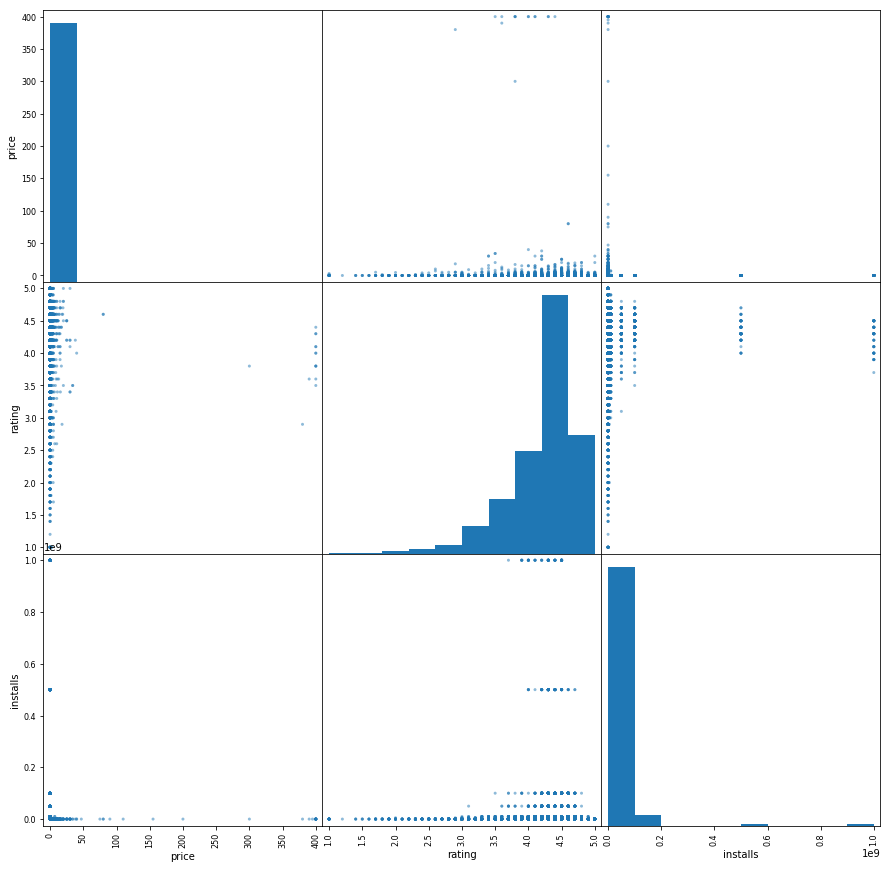

In [18]:
# make scatter matrix
cols = ['price', 'rating', 'installs']
pd.plotting.scatter_matrix(test_data[cols], figsize=(15, 15))
plt.show()

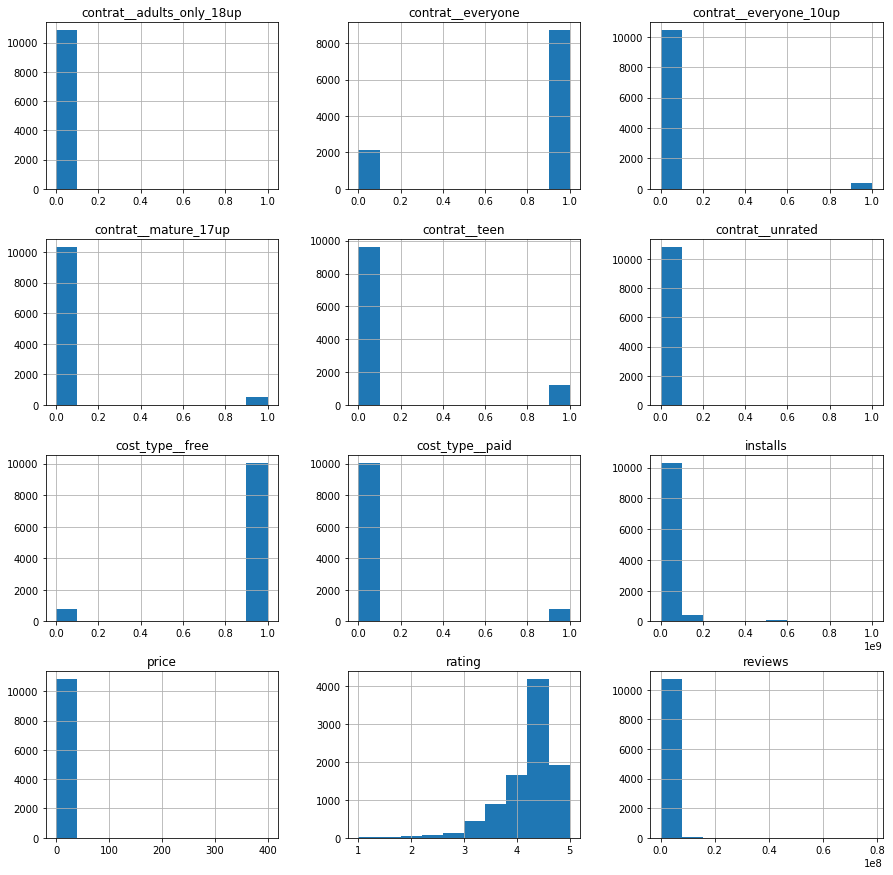

In [19]:
test_data.hist(figsize=(15, 15))
plt.show()

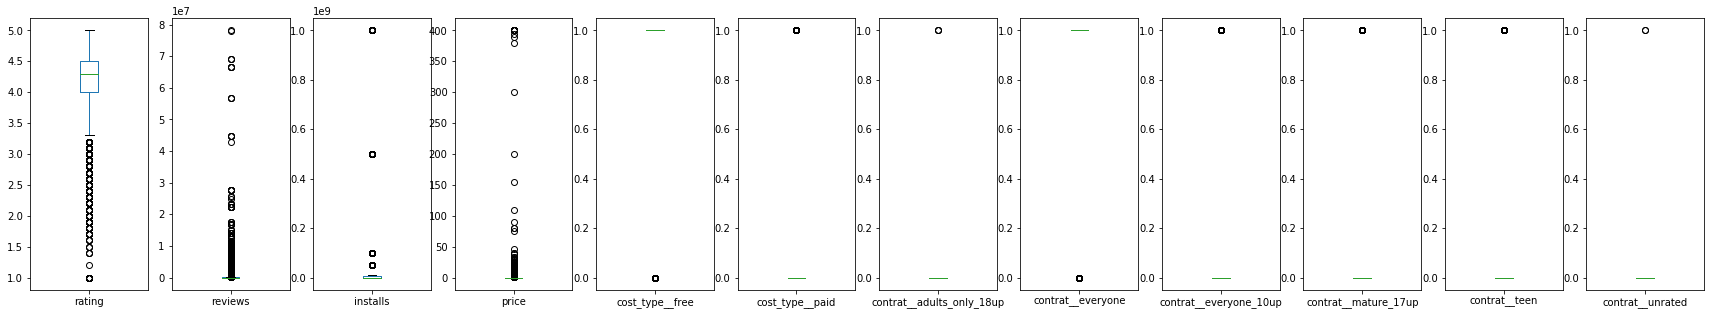

In [20]:
test_data.plot(kind='box', subplots=True, figsize=(30, 5))
plt.show()

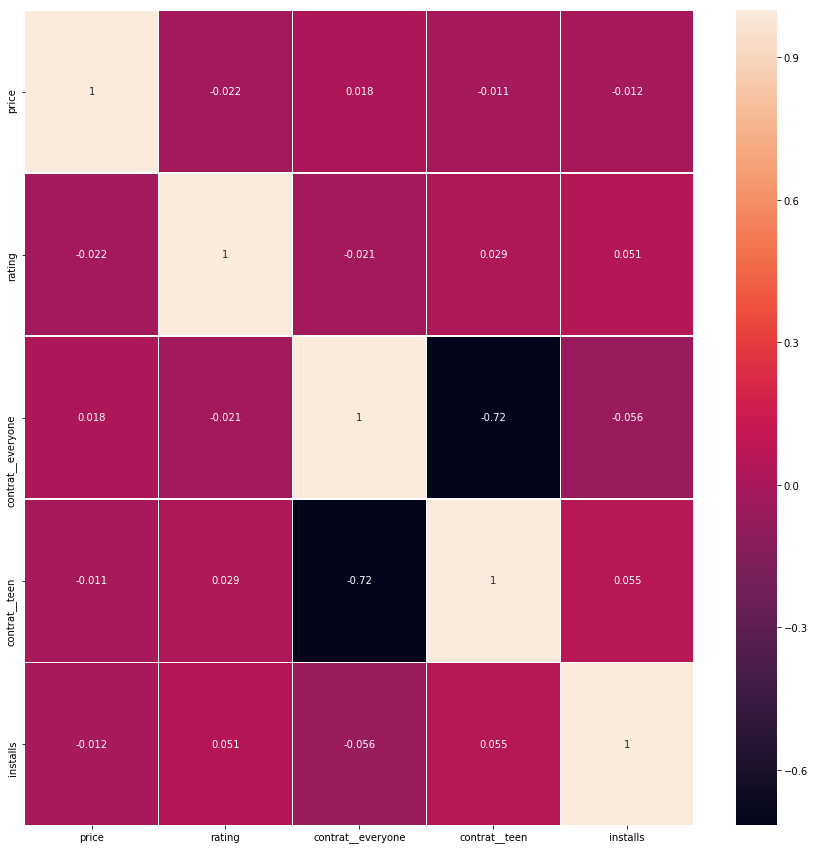

In [31]:
import seaborn as sns
columns = ['price', 'rating', 'contrat__everyone', 'contrat__teen', 'installs']
axsns = plt.subplots(figsize=(15, 15))
sns.heatmap(test_data[columns].corr(), annot=True, linewidths=.5)
plt.show()

In [32]:
# PCA

from sklearn.decomposition import PCA

In [38]:
# Convert data to array
data = test_data[columns].dropna(axis = 0).iloc[:,1:].values

# Perform PCA
pca = PCA(n_components=None) # Create an instance of the PCA class
"""
    We dont specify the amount of components to reduce to yet 
    as we want to see how many Princible Components explain the most varience in 
    the dataset
"""
pcaResults = pca.fit_transform(data) # Fit the data to the model
explained_variance = pca.explained_variance_ratio_ # Extract the varience

In [39]:
print(np.around(explained_variance,3) )

[1. 0. 0. 0.]


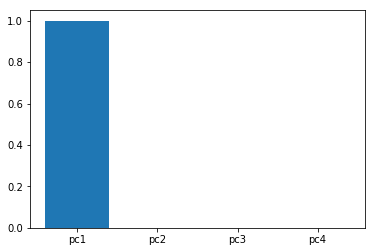

In [42]:
# Plot the explained varience
pcaComponents = ['pc1','pc2','pc3','pc4']
y_pos = np.arange(len(pcaComponents))
plt.bar(y_pos, explained_variance)
plt.xticks(y_pos, pcaComponents)
plt.show()

In [44]:
# Convert data to array
data =  test_data[columns].dropna(axis = 0).iloc[:,1:].values

# Perform PCA
pca = PCA(n_components=2) # Now specify 2 components
results = pca.fit_transform(data)

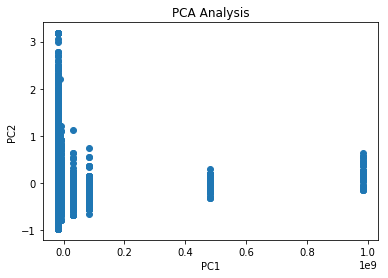

In [45]:
# Show Plot
plt.scatter(results[:,0], results[:,1])
plt.title('PCA Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [46]:
# Define Color map
color_map = {
 0: 'red',
 1: 'blue'}

In [51]:
# Create an array of colours based on the target column
colors = [color_map[c] for c in test_data.dropna(axis = 0)['cost_type__paid']]

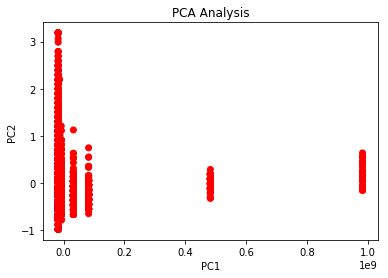

In [52]:
# Show Plot
plt.scatter(results[:,0], results[:,1], c=colors)
plt.title('PCA Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()